In [41]:
import numpy as np

def GetMatrix(links,cities):
    A = np.zeros((len(cities), len(cities)))
    
    for i in range(0, len(links), 3):
        A[cities.index(links[i]), cities.index(links[i + 1])] =  links[i + 2]
           
    return A        

cities = ['Atlanta','Boston', 'Calgary', 'Charleston','Chicago','Dallas', 
          'Denver', 'Duluth', 'ElPaso','Helena', 'Houston', 'KansasCity', 'LasVegas',
          'LittleRock', 'LosAngeles', 'Miami', 'Montreal', 'Nashville',
          'NewOrleans', 'NewYork', 'OklahomaCity', 'Omaha', 'Phoenix',
          'Pittsburgh', 'Portland', 'Raleigh', 'SaintLouis','SaltLakeCity',
          'SanFrancisco','SantaFe', 'SaultStMarie', 'Seattle', 'Toronto',
          'Vancouver', 'Washington', 'Winnipeg']

blue = ['Winnipeg','Helena',4,
        'Portland','SaltLakeCity',6,
        'Omaha','Chicago',4,
        'Montreal','NewYork',3,
        'KansasCity','SaintLouis',2,
        'SantaFe','OklahomaCity',3,
        'Atlanta','Miami',5]

blue = GetMatrix(blue, cities)

white = ['Calgary','Winnipeg',6,
         'Chicago','Toronto',4,
         'SaintLouis','Chicago',2,
         'Pittsburgh','NewYork',2,
         'SanFrancisco','SaltLakeCity',5,
         'Phoenix','Denver',5,
         'LittleRock','Nashville',3]

white = GetMatrix(white, cities)

green = ['Portland','SanFrancisco',5,
         'Helena','Denver',4,
         'SaintLouis','Pittsburgh',5,
         'LittleRock','NewOrleans',3,
         'ElPaso','Houston',6]

green = GetMatrix(green,cities)

red = ['Helena','Omaha',5,
       'Denver','OklahomaCity',4,
       'ElPaso','Dallas',4,
       'NewOrleans','Miami',6,
       'NewYork','Boston',2,
       'Duluth','Chicago',3]

red = GetMatrix(red,cities)

purple = ['Helena','SaltLakeCity',3,
          'Denver','Omaha',4,
          'Duluth','Toronto',6,
          'Charleston','Miami',4,
          'SanFrancisco','LosAngeles',3]
purple = GetMatrix(purple,cities)

orange = ['LasVegas','SaltLakeCity',3,
          'Helena','Duluth',6,
          'Chicago','Pittsburgh',3,
          'Denver','KansasCity',4,
          'NewYork','Washington',2,
          'Atlanta','NewOrleans',4]

orange = GetMatrix(orange,cities);

black = ['LosAngeles','ElPaso',6,
         'Winnipeg','Duluth',4,
         'SaultStMarie','Montreal',5,
         'Nashville','Raleigh',3]

black = GetMatrix(black,cities);

yellow = ['Seattle','Helena',6,
          'ElPaso','OklahomaCity',5,
          'Nashville','Pittsburgh',4]

yellow = GetMatrix(yellow,cities)

gray = ['Vancouver','Seattle',1,
        'Portland','Seattle',1,
        'Vancouver','Calgary',3,
        'Seattle','Calgary',4,
        'Calgary','Helena',4,
        'Winnipeg','SaultStMarie',6,
        'Duluth','SaultStMarie',3,
        'SaultStMarie','Toronto',2,
        'Toronto','Montreal',3,
        'Montreal','Boston',2,
        'Toronto','Pittsburgh',2,
        'LasVegas','LosAngeles',2,
        'LosAngeles','Phoenix',3,
        'Phoenix','ElPaso',3,
        'ElPaso','SantaFe',2,
        'Phoenix','SantaFe',3,
        'SantaFe','Denver',2,
        'Duluth','Omaha',2,
        'Omaha','KansasCity',1,
        'KansasCity','OklahomaCity',2,
        'OklahomaCity','Dallas',2,
        'Dallas','Houston',1,
        'Houston','NewOrleans',2,
        'Dallas','LittleRock',2,
        'OklahomaCity','LittleRock',2,
        'LittleRock','SaintLouis',2,
        'SaintLouis','Nashville',2,
        'Nashville','Atlanta',1,
        'Atlanta','Charleston',2,
        'Charleston','Raleigh',2,
        'Atlanta','Raleigh',2,
        'Raleigh','Washington',2,
        'Raleigh','Pittsburgh',2,
        'Washington','Pittsburgh',2]

gray = GetMatrix(gray,cities)

profit = blue * 1.0 +\
         white * 1.5 +\
         green * 2.0 +\
         red * 2.0 +\
         purple * 2.5 +\
         orange * 1.0 +\
         black * 1.0 +\
         yellow * 2.0 +\
         gray * 1.0

profit_sym = np.dstack([profit, profit.transpose()]).max(axis=2)

costs = np.ones((len(cities), 1)) * 10

The initial problem is:

$$\min_{x} \sum_{i, j} profit_{ij} x_i x_j - \sum_{i} x_i cost_i$$

We can rewrite it as maxflow problem.

$$\max_{x} \sum_{ij} profit_{ij} x_i - \sum_{i} x_i cost_i - \sum_{i, j} profit_{ij} max(x_j - x_i, 0)$$

We have to add two cities $x_s = 0$ and $x_t = 1$.

Then the edges from source to vertice i will cost max(0, $profit_i$), the edges from vertice i to sink will cost max(0,−$profit_i$).

Now we can derive binary minimization with pairewise terms.

$$\min_{x} \sum_{i} profit_i x_i + \sum_{i, j} profit_{ij}max(x_j - x_i, 0)$$

S.T. $$u_i = 10 - \sum_{j} profit_{ij}$$

Opened 27 cities: ['Atlanta', 'Calgary', 'Charleston', 'Chicago', 'Dallas', 'Denver', 'Duluth', 'ElPaso', 'Helena', 'Houston', 'LittleRock', 'LosAngeles', 'Miami', 'Nashville', 'NewOrleans', 'OklahomaCity', 'Omaha', 'Phoenix', 'Pittsburgh', 'Portland', 'SaintLouis', 'SaltLakeCity', 'SanFrancisco', 'SaultStMarie', 'Seattle', 'Toronto', 'Winnipeg']

 Optimal value of year profit is: 25.5


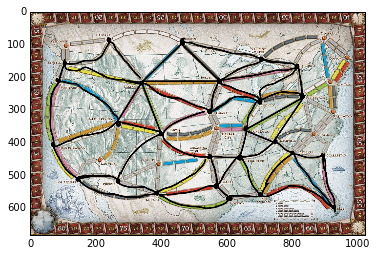

In [46]:
import cvxpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

city_profit = (costs.T - sum(profit)).ravel()

P = np.zeros((len(cities) + 2, len(cities) + 2))
P[1:(len(cities) + 1), 1: (len(cities) + 1)] = profit

positive = np.arange(len(cities))[city_profit > 0]
negative = np.arange(len(cities))[city_profit < 0]

# for source and sink
for i in positive:
    P[0, i + 1] = city_profit[i]
for i in negative:
    P[i + 1, nmb_c + 1] = - city_profit[i]
    
X = cvxpy.Variable(len(cities) + 2)

f = 0

for i in range(len(cities) + 2):
    for j in range(len(cities) + 2):
        f += P[i, j] * cvxpy.pos(X[j] - X[i])

objective = cvxpy.Minimize(f)
constraints = [X >= 0, X <= 1, X[0] == 0, X[-1] == 1]

solution = cvxpy.Problem(objective, constraints)
solution.solve(solver='GUROBI')

opened_cities = list(np.array(cities)[np.array(X.value).astype(bool)[1:-1].ravel()])
print("Opened {0} cities: {1}".format(len(opened_cities), opened_cities))

index = [cities.index(city) for city in opened_cities]

year_profit = - open_cost * len(opened_cities)

for i in index:
    for j in index:
        year_profit += profit[i, j] 
print("\n Optimal value of year profit is: {0}".format(year_profit)) 


plt.imshow(mpimg.imread('TicketToRide.png'))